In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
glue

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


<Axes: xlabel='fasdf', ylabel='Model'>

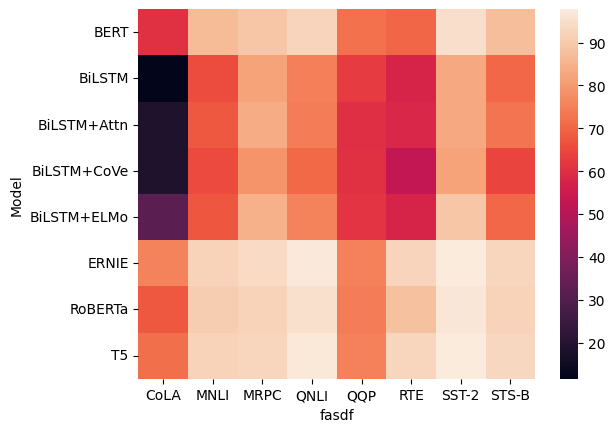

In [37]:
sns.heatmap(glue)

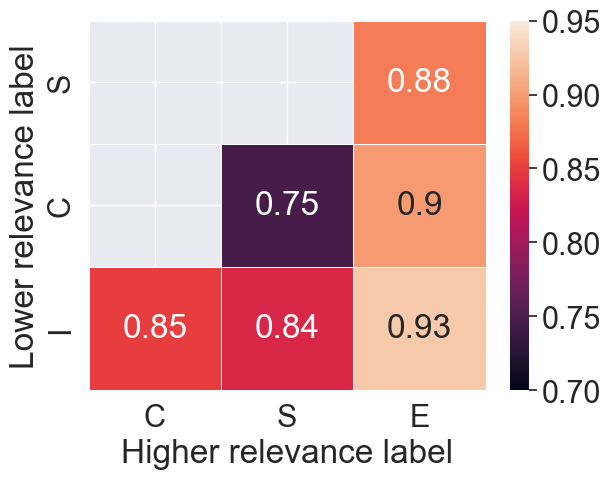

In [28]:
a = pd.DataFrame({
    "Lower relevance label": ['S', 'C', 'I'],
    "C": [np.nan, np.nan, 0.849],
    "S": [np.nan, 0.747, 0.836],
    "E": [0.882, 0.899, 0.928],
})
sns.set_style('dark')
sns.set_theme(font_scale=2.)
a.set_index("Lower relevance label", inplace=True)
a.columns.name = "Higher relevance label"
g = sns.heatmap(a, vmin=0.7, vmax=0.95, annot=True, linewidth=.5)
g.get_figure().savefig("diff_between_cand.pdf", bbox_inches='tight')

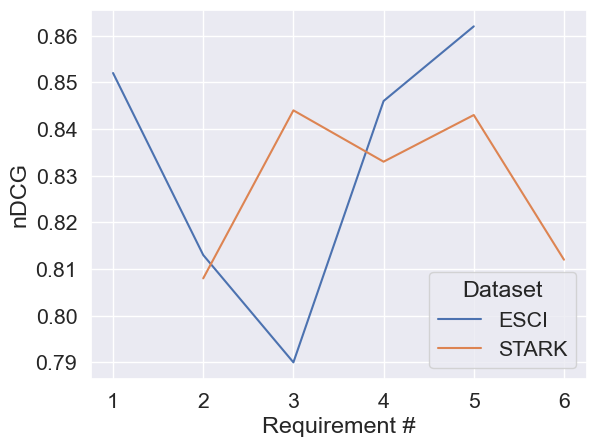

In [31]:
a = pd.DataFrame({
    "Requirement #": [1, 2, 3, 4, 5, 6] * 2,
    "nDCG": [0.852, 0.813, 0.79, 0.846, 0.862, np.nan] + [np.nan, 0.808, 0.844, 0.833, 0.843, 0.812],
    "Dataset": ["ESCI"] * 6 + ["STARK"] * 6
},)
sns.set_style("darkgrid")
sns.set_theme(font_scale=1.4)
g = sns.lineplot(data=a, x='Requirement #', y='nDCG', hue='Dataset')
g.get_figure().savefig("num_of_requirements.pdf", bbox_inches='tight')

/var/folders/09/sc3vk1yx58n0sr03knppy8lh0000gp/T/ipykernel_87889/3154257695.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=-30, horizontalalignment='left', fontsize=15, fontweight='bold')


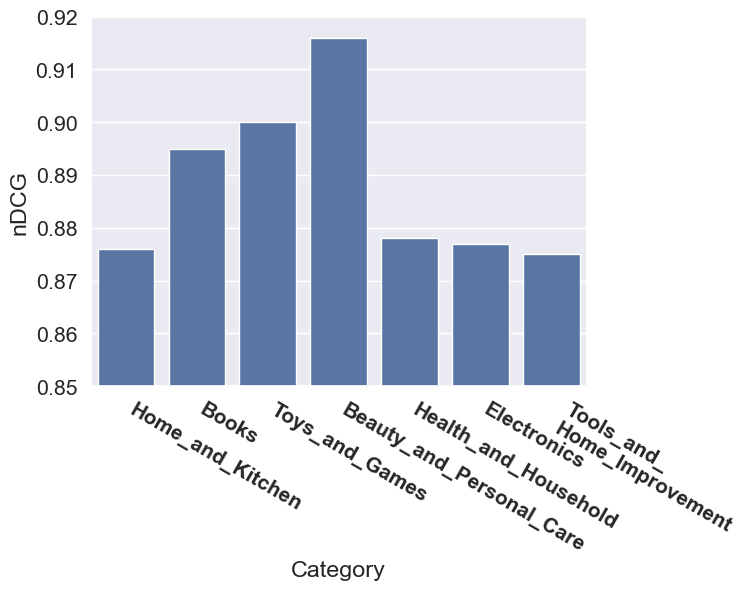

In [58]:
a = pd.DataFrame({
    "nDCG": [0.876, 0.895, 0.900, 0.916, 0.878, 0.877, 0.875],
    "Category": ['Home_and_Kitchen', 'Books', 'Toys_and_Games', 'Beauty_and_Personal_Care', 'Health_and_Household', 'Electronics', 'Tools_and_\nHome_Improvement'],
},)
sns.set_style("darkgrid")
sns.set_theme(font_scale=1.4)
g = sns.barplot(data=a, x='Category', y='nDCG')
g.set_ylim(0.85, 0.92)
g.set_xticklabels(g.get_xticklabels(), rotation=-30, horizontalalignment='left', fontsize=15, fontweight='bold')
# for item in g.get_xticklabels():
#     item.set_rotation(90)
g.get_figure().savefig("category.pdf", bbox_inches='tight')

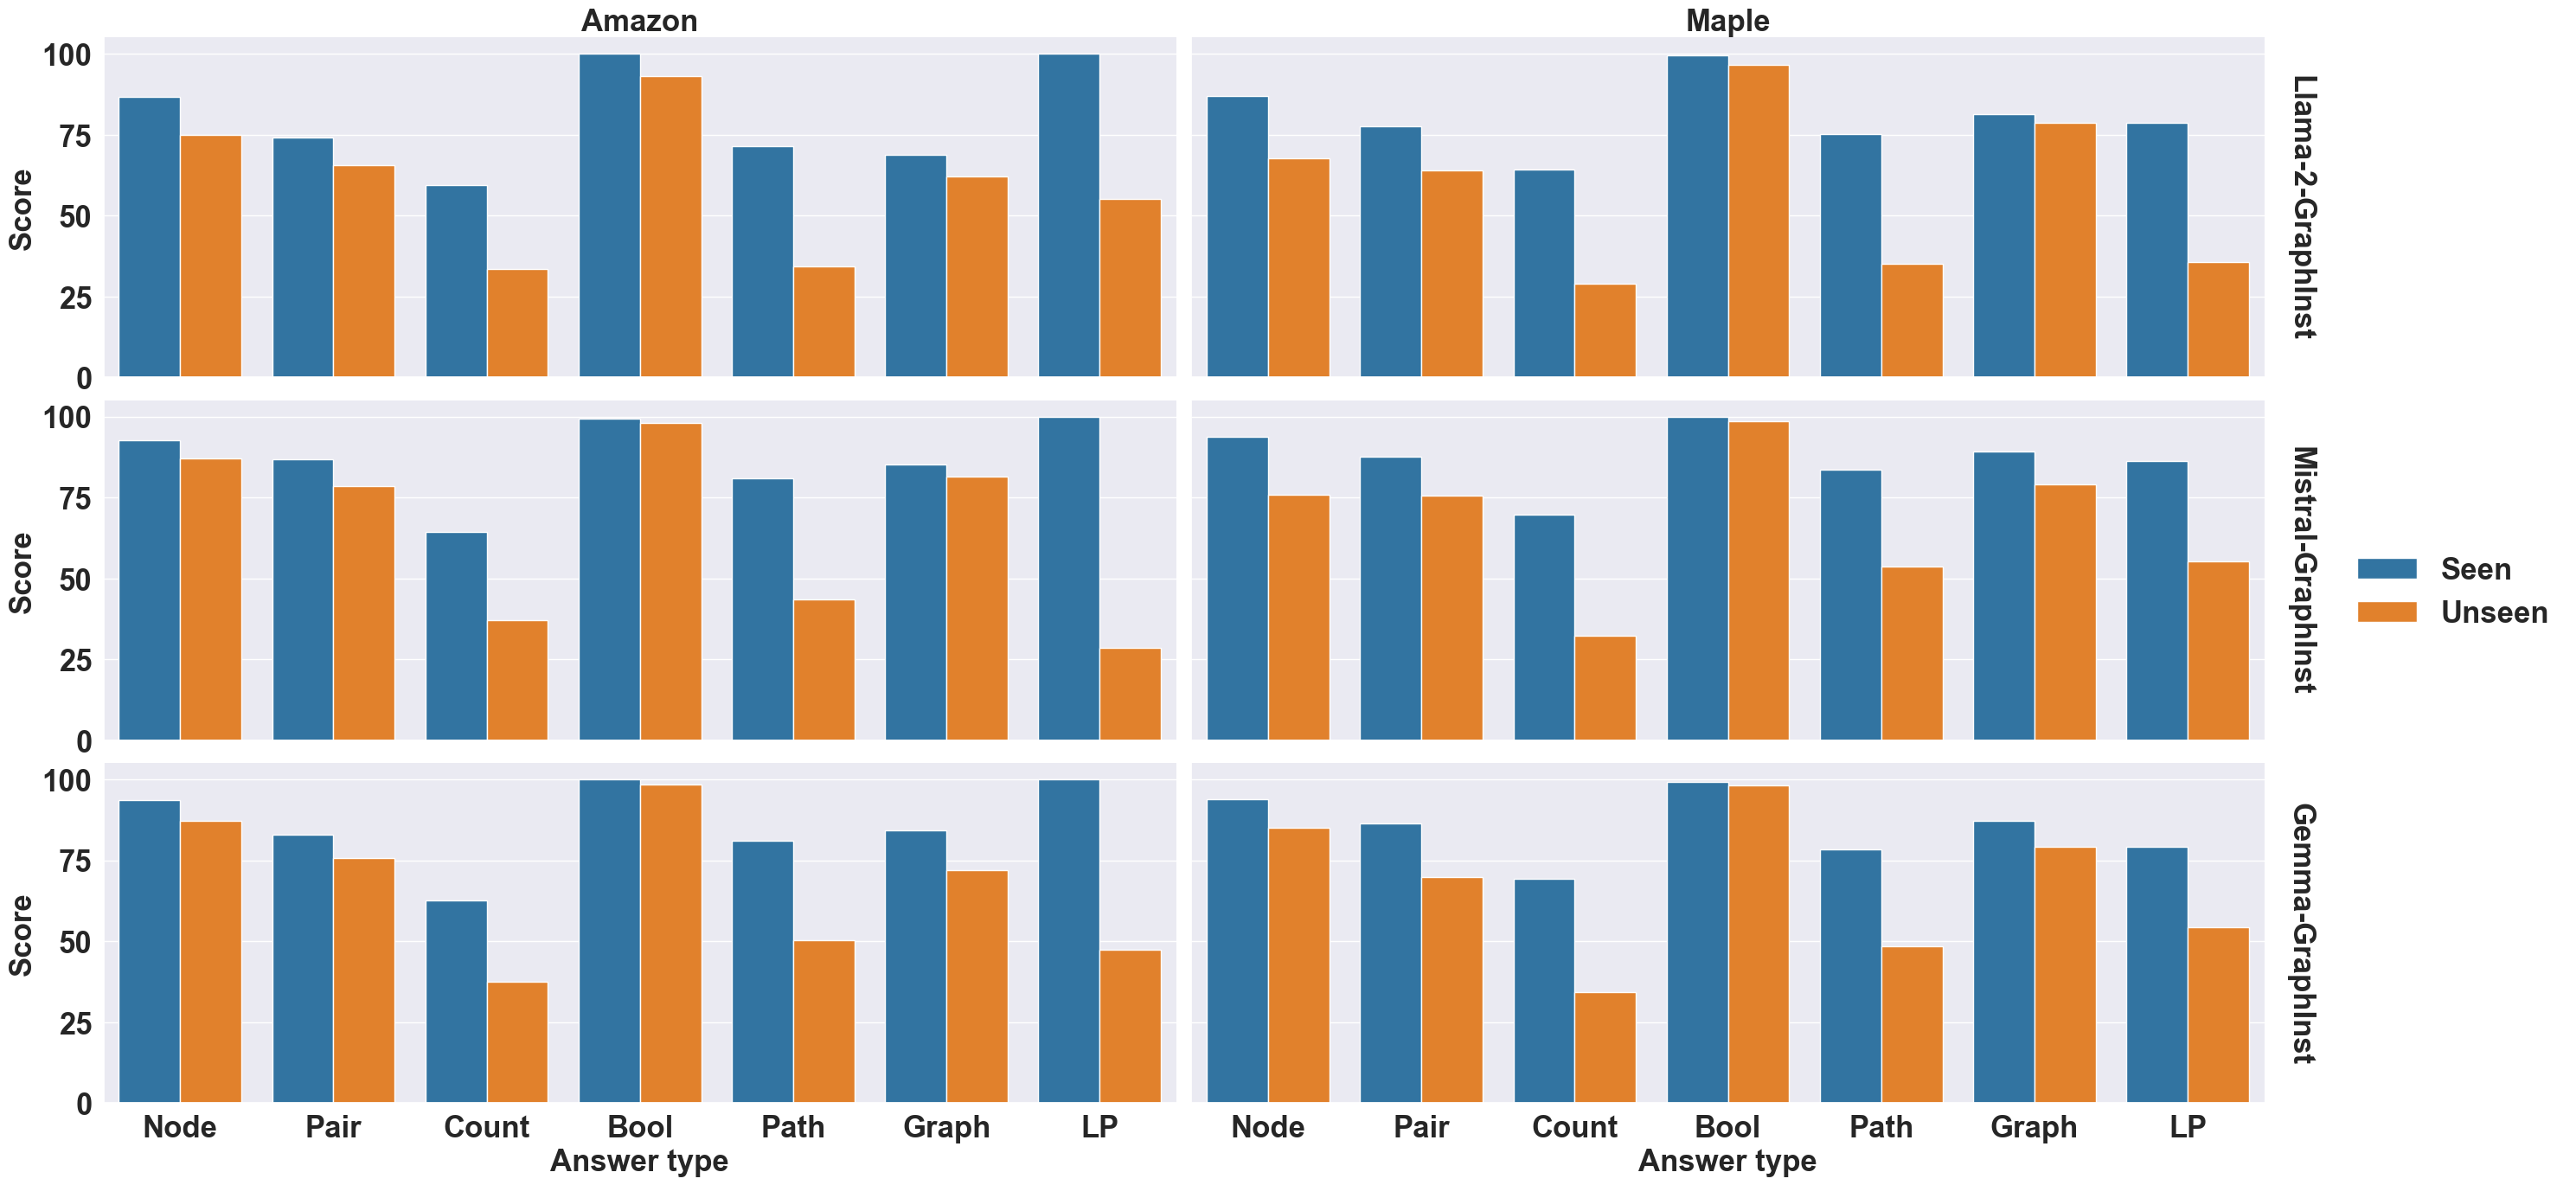

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 20, 'font.weight': 'bold'})
df1 = pd.DataFrame({'Answer type': ['Node', 'Pair', 'Count', 'Bool', 'Path', 'Graph', 'LP'] * 4 * 3,
                   'Score': 
                        [86.62, 74.21, 59.36, 100.00, 71.32, 68.67, 100.00] + [86.82, 77.50, 64.36, 99.58, 75.27, 81.43, 78.75] + 
                        [92.72, 86.78, 64.43, 99.48, 80.89, 85.12, 100.00] + [93.72, 87.61, 69.73, 99.79, 83.55, 89.30, 86.27] + 
                        [93.69, 82.97, 62.60, 100.00, 81.07, 84.22, 100.00] + [93.79, 86.37, 69.19, 99.16, 78.43, 87.23, 79.28] + 
                        
                        [74.84, 65.64, 33.59, 92.96, 34.17, 62.10, 55.05] + [67.66, 63.88, 28.88, 96.65, 35.16, 78.69, 35.75] + 
                        [87.06, 78.39, 37.12, 97.97, 43.42, 81.53, 28.44] + [75.78, 75.56, 32.15, 98.53, 53.67, 78.95, 55.31] + 
                        [87.19, 75.69, 37.36, 98.47, 50.30, 71.94, 47.25] + [84.98, 69.81, 34.30, 98.12, 48.35, 79.07, 54.19],
                   'Type': ['Seen'] * 7 * 6 + ['Unseen'] * 7 * 6,
                   'Model': ['Llama-2-GraphInst'] * 7 * 2 + ['Mistral-GraphInst'] * 7 * 2 + ['Gemma-GraphInst'] * 7 * 2 + ['Llama-2-GraphInst'] * 7 * 2 + ['Mistral-GraphInst'] * 7 * 2 + ['Gemma-GraphInst'] * 7 * 2,
                   'Dataset': ['Amazon'] * 7 + ['Maple'] * 7 + ['Amazon'] * 7 + ['Maple'] * 7 + ['Amazon'] * 7 + ['Maple'] * 7 + ['Amazon'] * 7 + ['Maple'] * 7 + ['Amazon'] * 7 + ['Maple'] * 7 + ['Amazon'] * 7 + ['Maple'] * 7
                   })
sns.set_theme()
g = sns.FacetGrid(df1, col='Dataset', row='Model', margin_titles=True, height=4.5, aspect=3)
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=25, weight='bold')
g.map(sns.barplot, 'Answer type', 'Score', 'Type', 
      order=['Node', 'Pair', 'Count', 'Bool', 'Path', 'Graph', 'LP'], 
      hue_order=['Seen', 'Unseen'],
      palette={'Seen': '#1f77b4', 'Unseen': '#ff7f0e'})
g.add_legend(fontsize=25)
plt.setp(g.legend.get_title(), fontsize=25)
g.set_xlabels(fontsize=25, fontweight='bold')
g.set_ylabels(fontsize=25, fontweight='bold')
g.tick_params(axis='both', labelsize=25)
g.savefig('sub_task_gen.pdf')